# Importing the dataset

In [1]:
# importing all the libraries in one place
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import preprocessing  # for encoding variables
from statsmodels.stats.outliers_influence import variance_inflation_factor  # for calculating VIF


# put these at the top in the end
from sklearn.model_selection import train_test_split
# Importing Library
import sklearn
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV, StratifiedKFold



from sklearn.utils import resample
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from plotnine import *
import plotnine

from itertools import product

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [1]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Cleaning the dataset

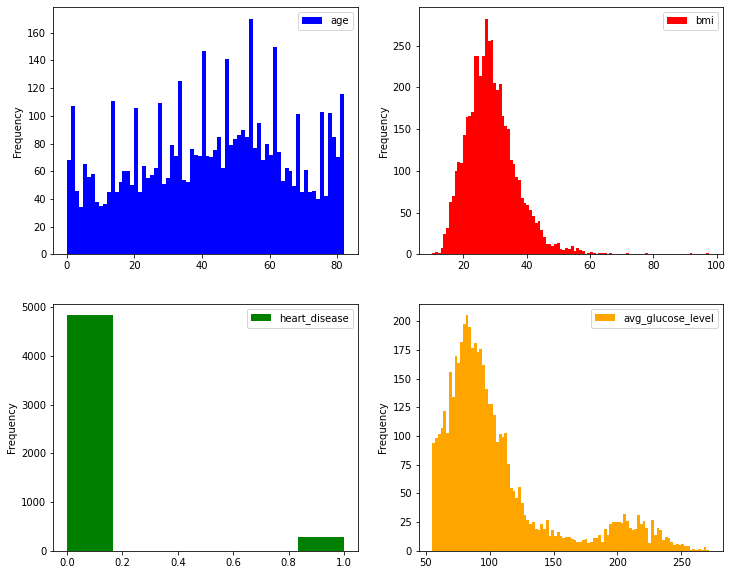

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

In [6]:
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum())
print ("\nUnique values :  \n",df.nunique())


Features : 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values :   id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Unique values :  
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


In [7]:
df=df.fillna(np.mean(df['bmi']))

In [8]:
# The id column is not relevant
df.drop(columns=['id'],inplace=True) 
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [9]:
data_numerical=df[['age','avg_glucose_level','bmi']]
data_categorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

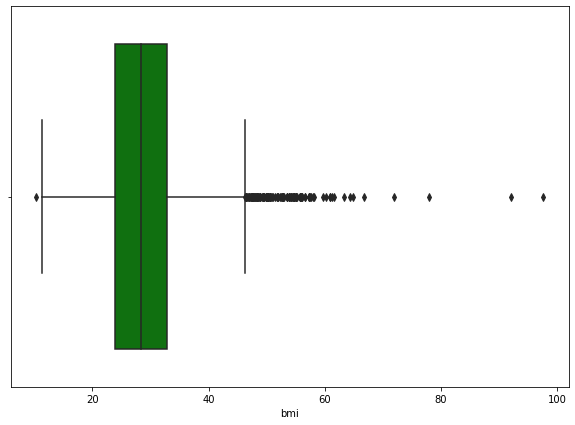

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

We find many outliers in BMI Plot

In [11]:
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [12]:
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)

In [13]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


# Visualisation

### Distribution of strokes in the dataset



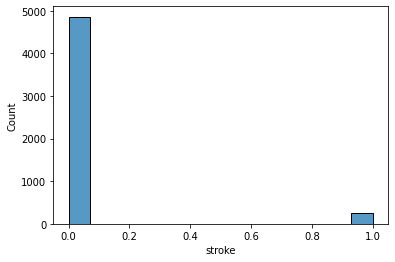

In [14]:
sns.histplot(x='stroke', data=df)

As we can see, our dataset is highly unbalanced. We will have to look into balancing the dataset going ahead.

### Finding insights between bmi and the stroke rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


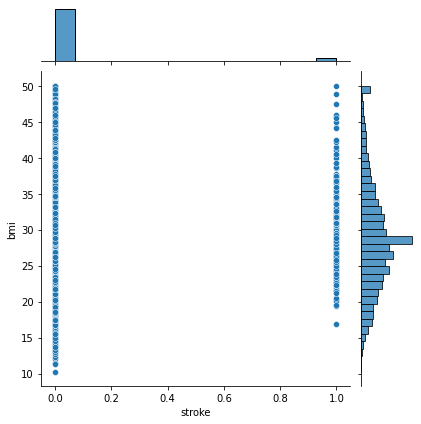

In [15]:
sns.jointplot( df.stroke , df.bmi)

We observe that people below a certain bmi have never had a stroke. Let's plot to see how the risk of getting a stroke scales with the bmi.

In [16]:
bmi_perc = []

for i in range(1,15):
  num1 = (df.bmi[df['stroke']==1][df.bmi[df['stroke']==1]<(i*2.5+15)][df.bmi[df['stroke']==1]>((i-1)*2.5+15)]).size
  num0 = (df.bmi[df['stroke']==0][df.bmi[df['stroke']==0]<(i*2.5+15)][df.bmi[df['stroke']==0]>((i-1)*2.5+15)]).size
  bmi_perc.append(round(num1/num0*100, 2))

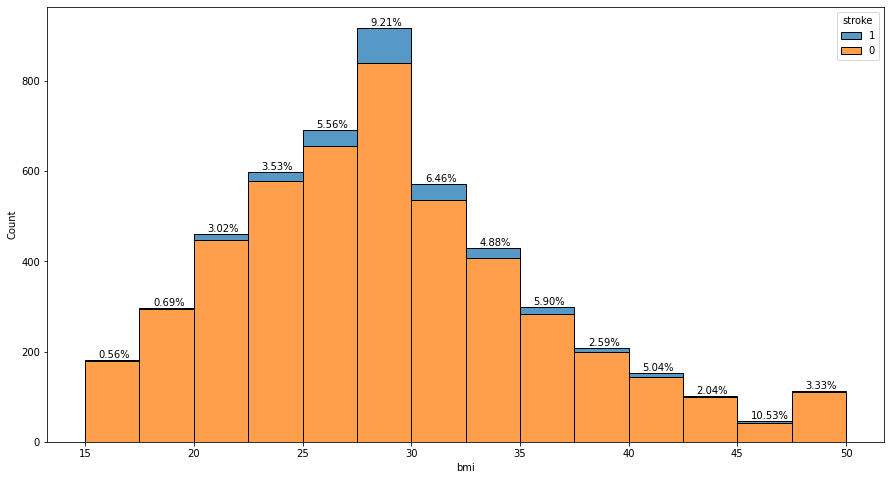

In [17]:
fig, axes = plt.subplots(figsize= (15,8))
ax = sns.histplot(x='bmi', hue='stroke', data=df, multiple='stack', binwidth=2.5, binrange=(15,50), hue_order=[1,0])

h = []
for rectangle in ax.patches:
    h.append(rectangle.get_height())
h = np.array(h).reshape(2, int(len(h)/2))
h = h[0]+h[1]

for i in range(14):
    x = ax.patches[i].get_x()
    y = h[i]
    ax.annotate("{:.2f}%".format(bmi_perc[i]), xy=(x+.625,y+5))

We see that  the rate of having a stroke for people below a bmi of 20 is less than 1%. While the rate of having a stroke for people with a bmi more than 20 is much higher and usually no less than 3% and even reaching a max of 10% in some cases.

### Finding relation between the lifstyle of a person and the risk of having a stroke

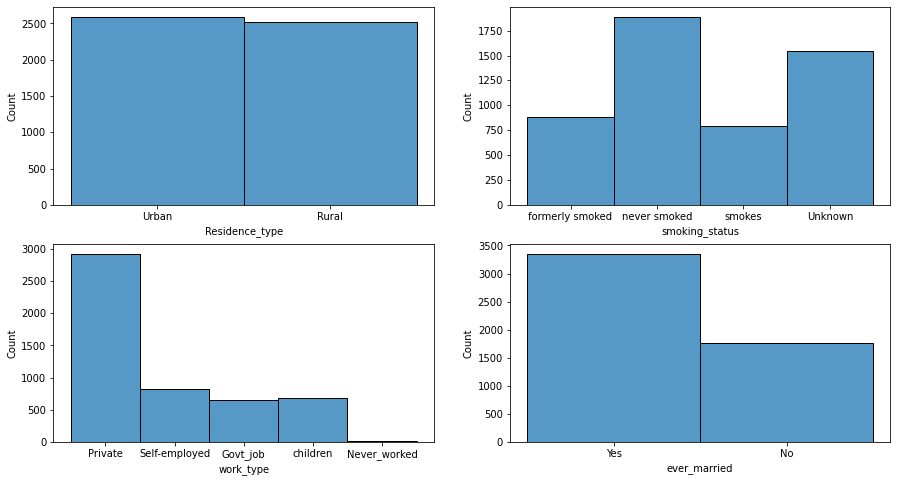

In [18]:
lifestyle = [['Residence_type', 'smoking_status'],['work_type', 'ever_married']]
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(15, 8))
for i in range(2):
  for j in range(2):
    sns.histplot(x=lifestyle[i][j], data=df, ax=ax[i][j])

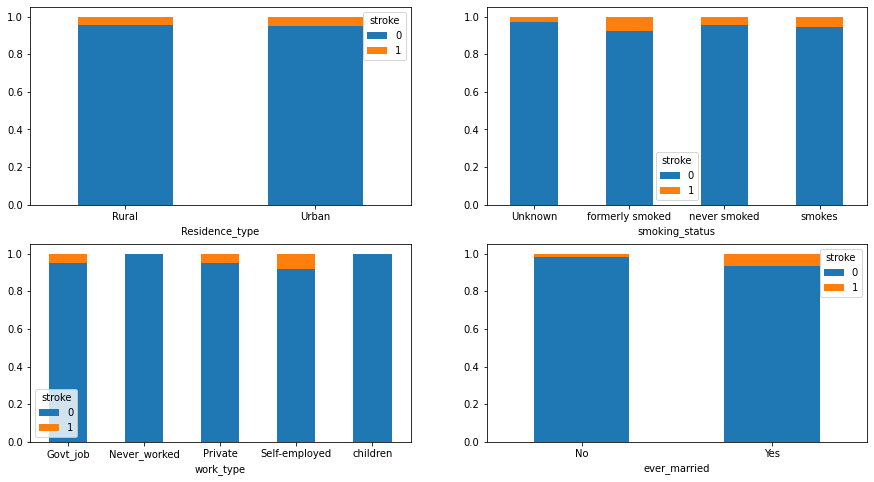

In [19]:
lifestyle = [['Residence_type', 'smoking_status'],['work_type', 'ever_married']]
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(15, 8))
for i in range(2):
  for j in range(2):
    df.groupby(lifestyle[i][j])['stroke'].value_counts(normalize=True).unstack('stroke').plot.bar(stacked=True, ax=ax[i][j], rot=0)

We can clearly observe from the graphs that:
*   Individuals who are married have a higher rate of having strokes than those who are not.
*    Employed individuals are more prone to strokes than children or unemployed people.
*    Former smokers are more prone to strokes than people who are currently smoking or people who have never smoked.
*    Residence type has close to no effect on who are more prone to strokes.

### General heatmap to find correlation between the different features in our dataset 

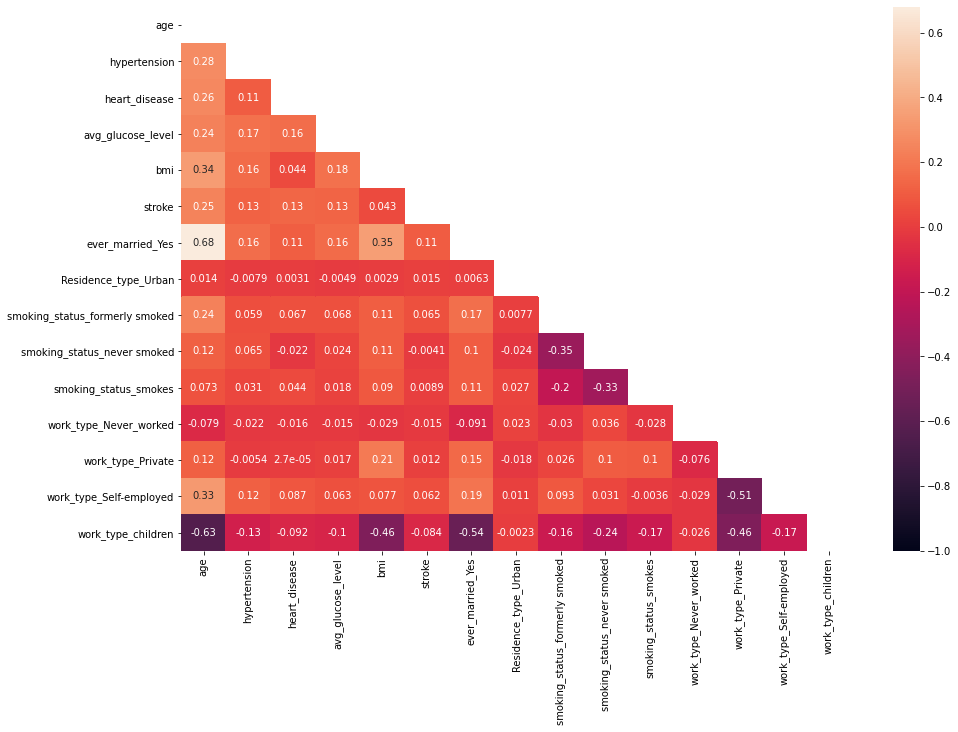

In [20]:
features = pd.get_dummies(df, columns=['ever_married','Residence_type', 'smoking_status','work_type'])
features.drop(columns=['ever_married_No','Residence_type_Rural','smoking_status_Unknown','work_type_Govt_job'], inplace=True)

fig, ax = plt.subplots(figsize= (15,10))
mask = np.triu(features.corr())
sns.heatmap(features.corr(), annot=True, mask=mask, vmin=-1)

We find that the rate of having a stroke is most correlated to the age of the person. Lets visulaize them to find some insights.

### Age vs Stroke analysis

In [21]:
age_perc = []

for i in range(1,18):
  num1 = (df.age[df['stroke']==1][df.age[df['stroke']==1]<(i*5)][df.age[df['stroke']==1]>((i-1)*5)]).size
  num0 = (df.age[df['stroke']==0][df.age[df['stroke']==0]<(i*5)][df.age[df['stroke']==0]>((i-1)*5)]).size
  age_perc.append(round(num1/num0*100, 2))

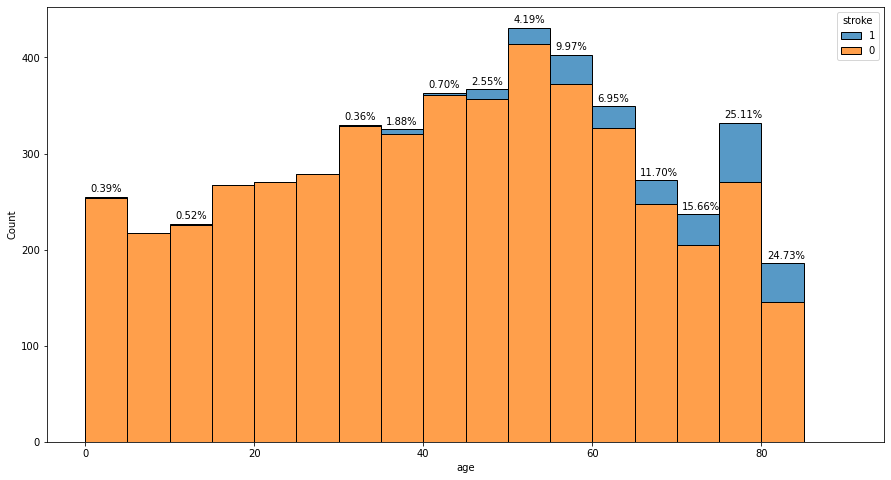

In [22]:
fig, ax = plt.subplots(figsize= (15,8))
ax = sns.histplot(x='age', hue='stroke', data=df, multiple='stack', hue_order=[1,0], binwidth=5, binrange=(0,90))

h = []
for rectangle in ax.patches:
    h.append(rectangle.get_height())
h = np.array(h).reshape(2, int(len(h)/2))
h = h[0]+h[1]

for i in range(17):
    if (i in [1,3,4,5]):
      continue
    x = ax.patches[i].get_x()
    y = h[i]
    ax.annotate("{:.2f}%".format(age_perc[i]), xy=(x+.625,y+5))

We can see that age is one of the most influentual factors affecting if a person will have a stroke or not. We see that people below the age of 30 very rarely have a stroke with a rate of less than 1%. While people older than 60 are at a much greater risk and have a rate ranging from 7%- 25%.

#Label encoding and OneHot encoding

In [23]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Product_importance'. 
tags=['gender', 'ever_married','Residence_type']
for tag in tags:
  df[tag]= label_encoder.fit_transform(df[tag])

In [24]:
df_onehot=df.copy(deep=True)
df_onehot = pd.get_dummies(df_onehot, columns=['work_type', 'smoking_status'])
# verifying
df_onehot.head(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.000000,1,0,0,1,0,0,0,1,0,0
6,1,74.0,1,1,1,0,70.09,27.400000,1,0,0,1,0,0,0,0,1,0
7,0,69.0,0,0,0,1,94.39,22.800000,1,0,0,1,0,0,0,0,1,0
8,0,59.0,0,0,1,0,76.15,28.893237,1,0,0,1,0,0,1,0,0,0
9,0,78.0,0,0,1,1,58.57,24.200000,1,0,0,1,0,0,1,0,0,0


In [25]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   work_type_Govt_job              5110 non-null   uint8  
 10  work_type_Never_worked          5110 non-null   uint8  
 11  work_type_Private               5110 non-null   uint8  
 12  work_type_Self-employed         51

In [26]:
df_dropped = df_onehot.drop(df_onehot.columns[[9,14 ]], axis = 1)  

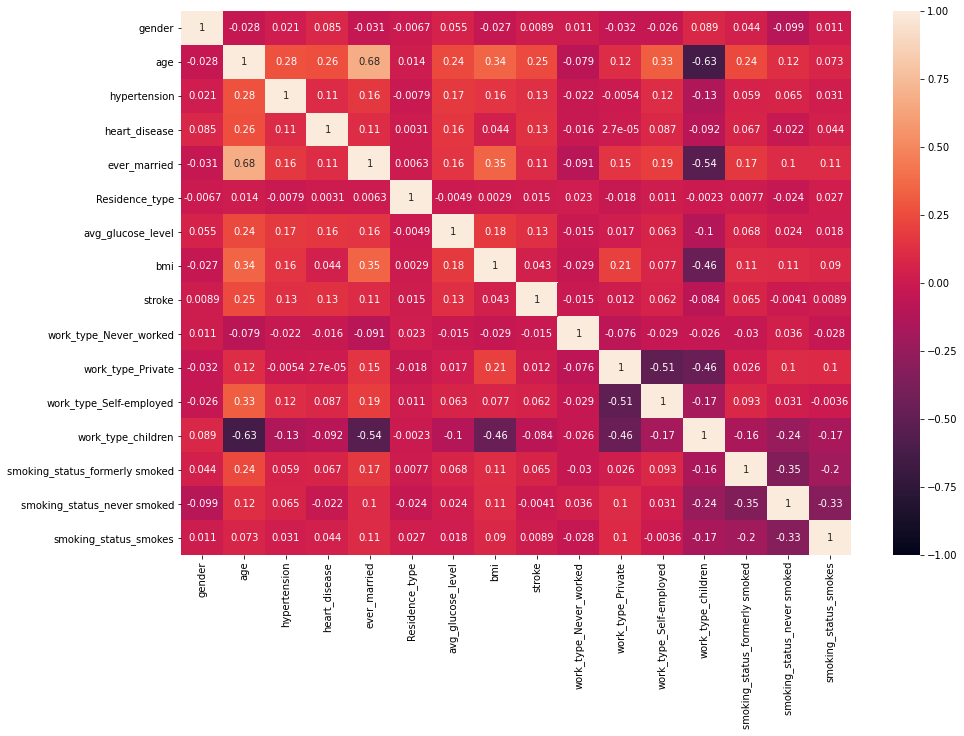

In [27]:
fig, ax = plt.subplots(figsize= (15,10))
sns.heatmap(df_dropped.corr(), annot=True, vmin=-1)

#Spliting the dataset

In [28]:
#x=df_onehot[['age'	,'hypertension'	,'heart_disease'	,'avg_glucose_level']]
X=df_dropped.drop(labels=['stroke' ], axis=1)
Y=df_dropped['stroke']

In [29]:
def split(df_independent, df_dependent):
    X_train, X_test, y_train, y_test = train_test_split(df_independent, df_dependent, test_size=0.2, random_state=42, stratify = df_dependent)
    X_red, X_val, y_red, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=42, stratify = y_train) # reduced test and validation
    return X_train, X_test, X_red, X_val, y_train, y_test, y_red, y_val

In [30]:
X_train, X_test, X_red, X_val, y_train, y_test, y_red, y_val = split(X,Y)

#Base Model

In [31]:
#Function to evaluate the models and output the accuracy, precision, recall, F! score of the model
def evaluate(model, x_test, y_test):
  pred= model.predict(x_test)
  conf_mat = confusion_matrix(y_test, pred)
  percent_matrix = (conf_mat.T/conf_mat.sum(axis=1)*100).T
  #plotting Confusion Matrix
  class_label = [0,1]
  df = pd.DataFrame(percent_matrix, index = class_label, columns = class_label)
  sns.heatmap(percent_matrix, annot = True, vmax=100, vmin=0)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()
  print('Score=', model.score(x_test, y_test))
  print('Recall=', recall_score(y_test, pred, average='weighted'))
  print('Precision=', precision_score(y_test, pred, average='weighted'))
  print('F1 score=', f1_score(y_test, pred, average='weighted'))
  print('roc score=', roc_auc_score(y_test, pred,average='weighted'))

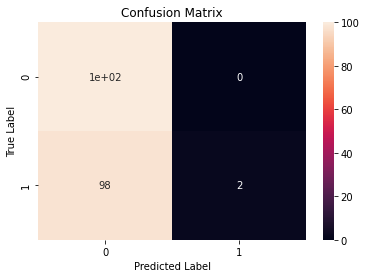

Score= 0.952054794520548
Recall= 0.952054794520548
Precision= 0.9543557887110408
F1 score= 0.9296116854869023
roc score= 0.51


In [32]:
log=LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)
evaluate(log, X_test, y_test)

#Oversampling With SMOTE

In [36]:
# transform the dataset
def over(X_train, y_train):
    oversample = SMOTE(random_state = 42)
    #X_red_smote, y_red_smote = oversample.fit_resample(X_red, y_red)
    X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

In [37]:
X_train_smote, y_train_smote = over(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


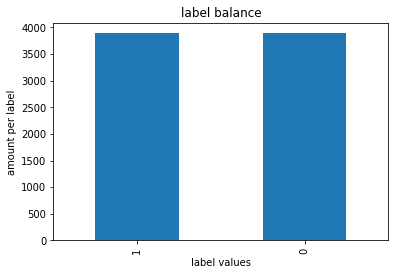

In [38]:
pd.Series(y_train_smote).value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

# Other Models

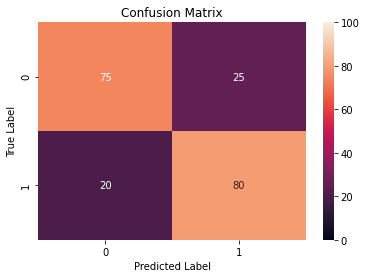

Score= 0.7514677103718199
Recall= 0.7514677103718199
Precision= 0.9450797669411054
F1 score= 0.8215235817375448
roc score= 0.7744855967078189


In [ ]:
logn=LogisticRegression(max_iter=1000)
logn.fit(X_train_smote, y_train_smote)
evaluate(logn, X_test, y_test)

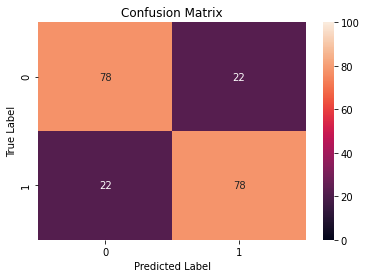

Score= 0.7759295499021527
Recall= 0.7759295499021527
Precision= 0.9448249295987251
F1 score= 0.8381198682403933
roc score= 0.7778600823045267


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svmmodel =  SVC(kernel='poly')
svmmodel.fit(X_train_smote, y_train_smote)
evaluate(svmmodel, X_test, y_test)

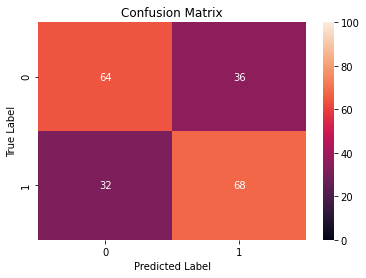

Score= 0.6448140900195695
Recall= 0.6448140900195695
Precision= 0.9317023989956933
F1 score= 0.7447587434463842
roc score= 0.6615020576131688


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb= MultinomialNB()
mnb.fit(X_train_smote, y_train_smote)
evaluate(mnb, X_test, y_test)

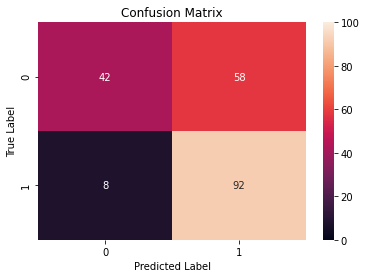

Score= 0.4461839530332681
Recall= 0.4461839530332681
Precision= 0.945588640302364
F1 score= 0.5695262392601779
roc score= 0.6709053497942388


In [ ]:
gnb= GaussianNB()
gnb.fit(X_train_smote, y_train_smote)
evaluate(gnb, X_test, y_test)

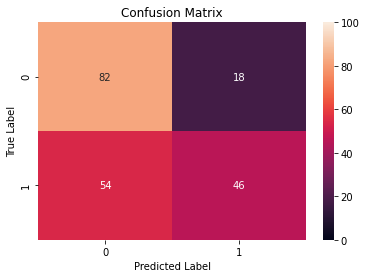

Score= 0.8052837573385518
Recall= 0.8052837573385518
Precision= 0.9257959468325373
F1 score= 0.8550567729128553
roc score= 0.641522633744856


In [ ]:
bnb=BernoulliNB()
bnb.fit(X_train_smote, y_train_smote)
evaluate(bnb, X_test, y_test)

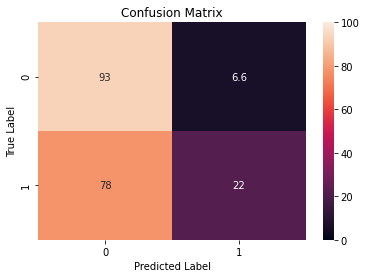

Score= 0.8992172211350293
Recall= 0.8992172211350293
Precision= 0.9190839200386293
F1 score= 0.9086390192217284
roc score= 0.5770781893004115


In [ ]:
tree= DecisionTreeClassifier()
tree.fit(X_train_smote, y_train_smote)
evaluate(tree, X_test, y_test)

In [39]:
import xgboost as xgb

D_train = xgb.DMatrix(X_train_smote,label= y_train_smote)
D_test = xgb.DMatrix(X_test.values, label=y_test.values)

In [40]:
param = {
    'booster':'dart',
    'eta': 0.001, 
    'max_depth': 7,  
    'num_class': 2,
    'n_estimators':2000,
    'objective':'multi:softprob',
    'sample_type':'weighted',
    'normalize_type':'forest',
    'tree_method':'gpu_hist'} 


steps = 200  # The number of training iterations

In [41]:
bst = xgb.train(param, D_train, steps)

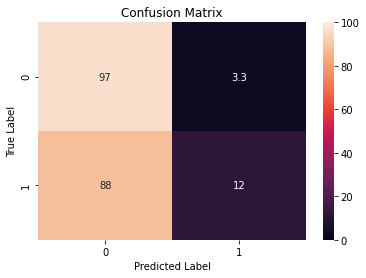

accuracy= 0.9256360078277887
Roc score= 0.5435390946502058
F1 score= 0.9207938460396651


In [42]:
preds = bst.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
conf_mat = confusion_matrix(y_test, best_preds)
percent_matrix = (conf_mat.T/conf_mat.sum(axis=1)*100).T
#plotting Confusion Matrix
class_label = [0,1]
df = pd.DataFrame(percent_matrix, index = class_label, columns = class_label)
sns.heatmap(percent_matrix, annot = True, vmax=100, vmin=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print('accuracy=', accuracy_score(y_test, best_preds))
print('Roc score=', roc_auc_score(y_test, best_preds))
print('F1 score=', f1_score(y_test, best_preds,average='weighted'))

#Ensemble models

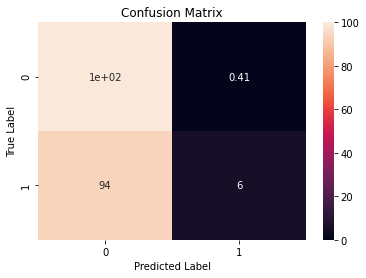

Score= 0.9500978473581213
Recall= 0.9500978473581213
Precision= 0.9280036246903107
F1 score= 0.9318150634391856
roc score= 0.5279423868312758


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gtb= GradientBoostingClassifier()
gtb.fit(X_train_smote, y_train_smote)
evaluate(gtb, X_test, y_test)

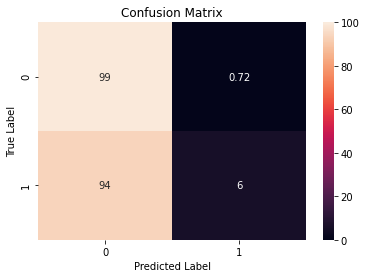

Score= 0.9471624266144814
Recall= 0.9471624266144814
Precision= 0.9215828840605494
F1 score= 0.9300825389811249
roc score= 0.5263991769547325


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost= AdaBoostClassifier()
adaboost.fit(X_train_smote, y_train_smote)
evaluate(adaboost, X_test, y_test)

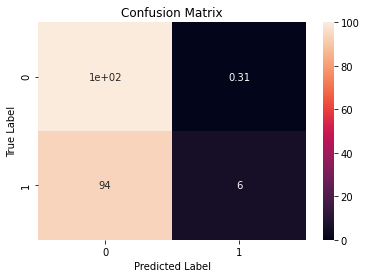

Score= 0.9510763209393346
Recall= 0.9510763209393346
Precision= 0.9315415196388123
F1 score= 0.9323977130887083
roc score= 0.5284567901234568


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train_smote, y_train_smote)
evaluate(rfc, X_test, y_test) 

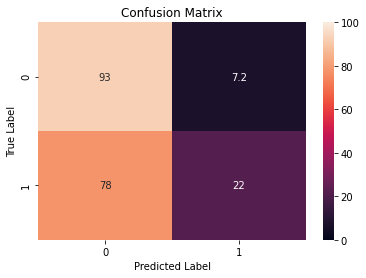

Score= 0.8933463796477495
Recall= 0.8933463796477495
Precision= 0.9183026615030846
F1 score= 0.9051015447804475
roc score= 0.5739917695473252


In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [('lr', BernoulliNB()),('tree', DecisionTreeClassifier())]

clf = StackingClassifier(estimators=estimators, final_estimator=AdaBoostClassifier())
clf.fit(X_train_smote, y_train_smote)
evaluate(clf, X_test, y_test)

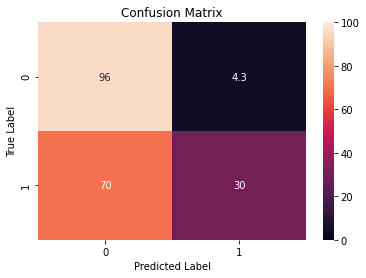

Score= 0.9246575342465754
Recall= 0.9246575342465754
Precision= 0.9294559772274749
F1 score= 0.9269858697743482
roc score= 0.6283950617283951


In [ ]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(
    estimators=[('lr', GaussianNB()), ('rf', DecisionTreeClassifier(criterion='gini', max_depth=21, min_samples_split=2,random_state=0, max_features=7))],
    voting='hard')

eclf.fit(X_train_smote, y_train_smote)
evaluate(eclf, X_test, y_test)

#Tuning hyperparameters of various models

##SVM

In [ ]:
from sklearn.model_selection import GridSearchCV 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.530, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.544, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.535, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.534, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.531, total=   2.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.843, total=   2.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.854, total=   2.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.857, total=   2.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.868, total=   2.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
grid_predictions = grid.predict(X_test)

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.16      0.24      0.19        50

    accuracy                           0.90      1022
   macro avg       0.56      0.59      0.57      1022
weighted avg       0.92      0.90      0.91      1022



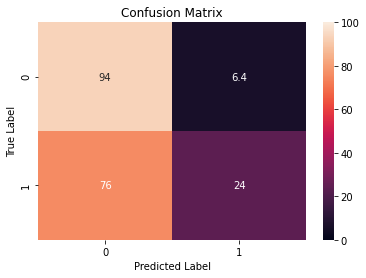

Score= 0.9021526418786693
Recall= 0.9021526418786693
Precision= 0.920886578074024
F1 score= 0.9110101950634432
roc score= 0.5881069958847737


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svmmodel = SVC(C=100, break_ties=False, 
               cache_size=200, class_weight=None, 
               coef0=0.0,decision_function_shape='ovr', 
               degree=3, gamma=0.01, kernel='rbf',
               max_iter=-1, probability=False, 
               random_state=None, shrinking=True,
               tol=0.001, verbose=False)
svmmodel.fit(X_train_smote, y_train_smote)
evaluate(svmmodel, X_test, y_test)

##Decision Tree

In [ ]:
from sklearn.metrics import roc_curve, auc

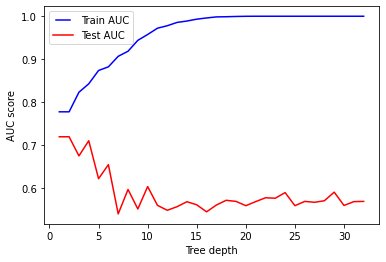

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train_smote, y_train_smote)
   train_pred = dt.predict(X_train_smote)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_smote, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

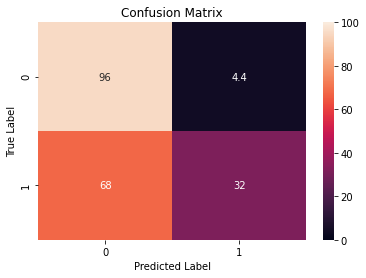

Score= 0.9246575342465754
Recall= 0.9246575342465754
Precision= 0.930764740728525
F1 score= 0.9275927879795763
roc score= 0.637880658436214


In [ ]:
#Tuned decision tree model
tree= DecisionTreeClassifier(criterion='gini', 
                             max_depth=21, 
                             min_samples_split=2,
                             random_state=0, 
                             max_features=7)
tree.fit(X_train_smote, y_train_smote)
evaluate(tree, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
dec_tree = DecisionTreeClassifier()
ftwo_scorer = make_scorer(f1_score)
n_components = list(range(1,X.shape[1]+1,1))
max_depth = range(3, 30)
random_state=range(0,30)
parameters = dict(max_features=n_components,
                  max_depth=max_depth, 
                  random_state=random_state)
clf_GS = GridSearchCV(dec_tree, parameters, 
                      scoring=ftwo_scorer)
clf_GS.fit(X_train_smote, y_train_smote)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['max_features'])
print(clf_GS.best_estimator_.get_params())

Best Criterion: gini
Best Number Of Components: 6
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 21, 'max_features': 6, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 10, 'splitter': 'best'}


#Dumping the best performing model

In [ ]:
from sklearn.externals import joblib

joblib.dump(bst, 'bst_model.pkl', compress=True)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['bst_model.pkl']

In [ ]:
import pickle
with open("model.pickle", "wb") as f:
  pickle.dump(tree, f)